In [18]:
from keras.models import Sequential   
from keras.layers.core import Flatten, Dense, Dropout  
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D 
from keras.optimizers import SGD
import cv2
import numpy as np

In [5]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [6]:
model = VGG_16('vgg16_weights.h5')

INFO (theano.gof.compilelock): Waiting for existing lock by process '9590' (I am process '32141')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/zhaozhichao/.theano/compiledir_Darwin-16.4.0-x86_64-i386-64bit-i386-2.7.10-64/lock_dir


In [9]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [10]:
def load_image(imageurl):
    im = cv2.resize(cv2.imread(imageurl),(224,224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im,axis=0)
    return im

In [11]:
f = open('synset_words.txt','r')
lines = f.readlines()
f.close()

In [12]:
def predict(url):
    im = load_image(url)
    pre = np.argmax(model.predict(im))
    print lines[pre]

In [13]:
from IPython.display import Image

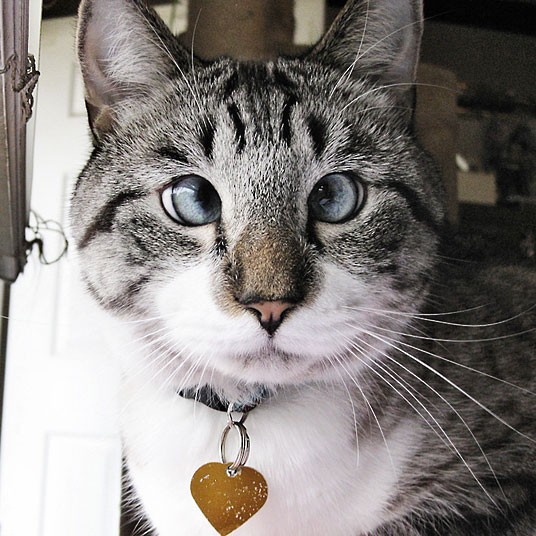

In [14]:
Image('cat1.jpg')

In [19]:
predict('cat1.jpg')

n02123045 tabby, tabby cat



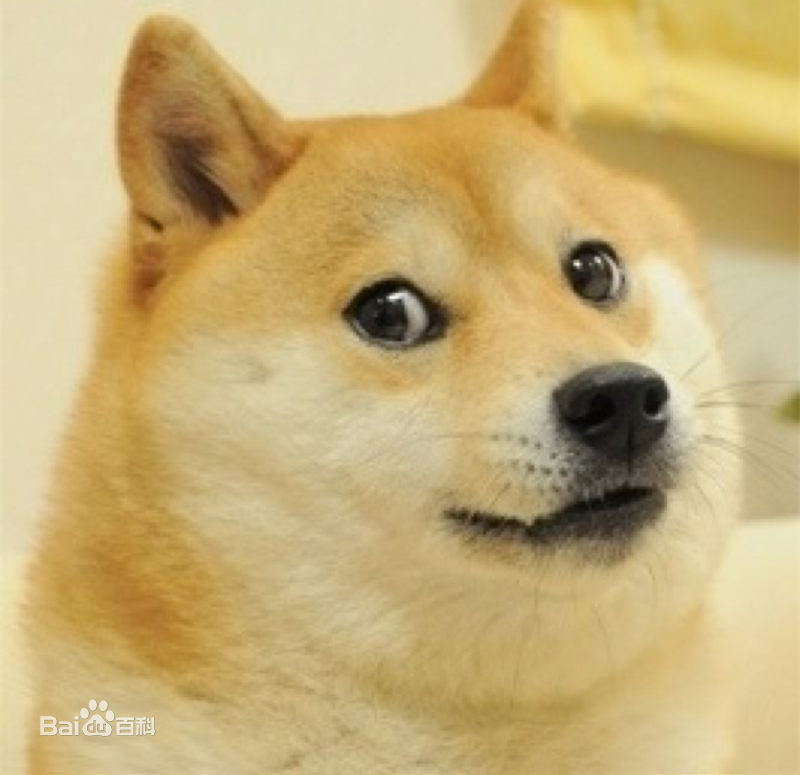

In [21]:
Image('dog1.jpeg')

In [22]:
predict('dog1.jpeg')

n02115641 dingo, warrigal, warragal, Canis dingo

